In [1]:
# Assignment 3: learning by gradient descent

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randint

## Extensions 3 and 4

In [2]:
# Load the data
xi = pd.read_csv("Data/xi.csv", delimiter=',', header=None)
tau = pd.read_csv("Data/tau.csv", delimiter=',', header=None)
D = (xi, tau) # xi = 50x5000-dim array, tau = 1x5000-dim vector with target values

In [3]:
# Implementation of a shallow feed-forward neural network
def feed_forward_nn(weight_matrix, xi, fixed_vk = 1):
    # weight_matrix = [w1, w2, ..., wk]
    # xi = input vector of N-dim
    # vk = 1 for k = 1,...,K
    (Ndim, Kdim) = weight_matrix.shape
    vk = np.ones(shape=(Kdim, 1))*fixed_vk
    sigma = 0
    for k in range(Kdim):
        wk = weight_matrix[:, k]
        sigma += vk[k] * np.tanh(np.dot(wk, xi))
    return sigma

In [4]:
# Evaluation metrics
def cost_function(weight_matrix, P, Q, Dataset, fixed_vk = 1):
    # Computes the cost function of E (0:P examples) and E_test (P+1:Q examples)
    E_train = 0
    for mu in range(P):
        xi_mu = Dataset[0][mu]; tau_mu = Dataset[1][mu]
        sigma_mu = feed_forward_nn(weight_matrix, xi_mu, fixed_vk)
        E_train += (sigma_mu - tau_mu)**2
    E_train /= (2*P)
    
    E_test = 0
    for mu in range(Q):
        mu_t = P + mu
        xi_mu = Dataset[0][mu_t]; tau_mu = Dataset[1][mu_t]
        sigma_mu = feed_forward_nn(weight_matrix, xi_mu, fixed_vk)
        E_test += (sigma_mu - tau_mu)**2
    E_test /= (2*Q)
    
    return E_train, E_test

In [5]:
# Training of the neural network
def train_feed_forward_nn(Dataset, K, P, Q, t_max, eta=0.05, fixed_v = 1):
    N_dim = len(Dataset[0][0])
    
    # Weights initialization. Each w_k vector is independently generated from the others, and should have a norm 1.
    # The v_k weights are fixed to 1, not being updated during training
    W = np.zeros(shape=(N_dim, K)); v = np.ones(shape=(K, 1)) * fixed_v
    for k in range(K):
        w_k = rand(N_dim)
        W[:, k] = w_k / np.sqrt(np.dot(w_k, w_k))
    
    E_train = []; E_test = []
    for t_i in range(t_max):
        nu_vector = randint(0, P, size=P) # gets a random vector with values between 0 and P
        
        print('# Step {} out of {}'.format(t_i + 1, t_max))
        
        for nu in nu_vector: 
            xi_nu = Dataset[0][nu]; tau_nu = Dataset[1][nu]
            sigma_nu = feed_forward_nn(W, xi_nu, fixed_v)
            
            diff = (sigma_nu - tau_nu) 
            for k in range(K): # updates each weight vector w_k
                w_k = W[:, k]
                grad_e_k = float(diff * v[k] * (1 - np.tanh(np.dot(w_k, xi_nu))**2)) * xi_nu
                w_k -= eta * grad_e_k
                W[:, k] = w_k
                
        # After performing P updates, the costs are estimated
        E_tr, E_ts = cost_function(W, P, Q, Dataset, fixed_v)
        E_train.append(E_tr); E_test.append(E_ts)
    
    return (W, v), (E_train, E_test)

        


In [6]:
# Testing of the neural network
K = 2; P = 100; Q = 200; t_max = 200
(W, v), (E_train, E_test) = train_feed_forward_nn(D, K, P, Q, t_max, eta=0.05)      

# Step 1 out of 200
# Step 2 out of 200
# Step 3 out of 200
# Step 4 out of 200
# Step 5 out of 200
# Step 6 out of 200
# Step 7 out of 200
# Step 8 out of 200
# Step 9 out of 200
# Step 10 out of 200
# Step 11 out of 200
# Step 12 out of 200
# Step 13 out of 200
# Step 14 out of 200
# Step 15 out of 200
# Step 16 out of 200
# Step 17 out of 200
# Step 18 out of 200
# Step 19 out of 200
# Step 20 out of 200
# Step 21 out of 200
# Step 22 out of 200
# Step 23 out of 200
# Step 24 out of 200
# Step 25 out of 200
# Step 26 out of 200
# Step 27 out of 200
# Step 28 out of 200
# Step 29 out of 200
# Step 30 out of 200
# Step 31 out of 200
# Step 32 out of 200
# Step 33 out of 200
# Step 34 out of 200
# Step 35 out of 200
# Step 36 out of 200
# Step 37 out of 200
# Step 38 out of 200
# Step 39 out of 200
# Step 40 out of 200
# Step 41 out of 200
# Step 42 out of 200
# Step 43 out of 200
# Step 44 out of 200
# Step 45 out of 200
# Step 46 out of 200
# Step 47 out of 200
# Step 48 out of 200
#

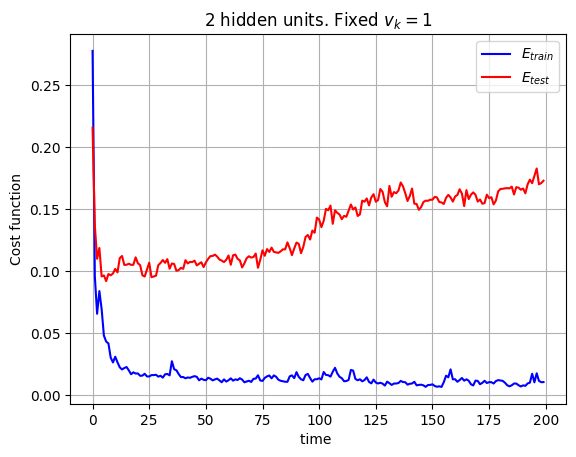

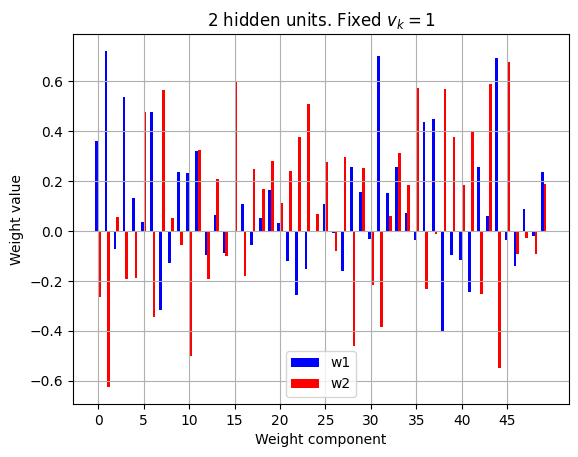

In [8]:
# Plot the final trained weight vectors and the evolution of the cost functions
def plot_costs(weight_matrix, E_train, E_test, title = ''):
    N_dim = len(weight_matrix[:, 0]); t_max = len(E_train)
    
    t = range(t_max)
    plt.plot(t, E_train, label='$E_{train}$', color='b')
    plt.plot(t, E_test, label='$E_{test}$', color='r')
    plt.xlabel('time ')
    plt.ylabel('Cost function')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()
    
def plot_weights(weight_matrix, bin_width=0.3, title = ''):
    N_dim = len(weight_matrix[:, 0])


    x = np.array(range(N_dim))
    plt.bar(x - bin_width / 2, weight_matrix[:,0], width=bin_width, color='blue', label='w1')
    plt.bar(x + bin_width / 2, weight_matrix[:,1], width=bin_width, color='red', label='w2')
    plt.xlabel('Weight component')
    plt.ylabel('Weight value')
    plt.xticks(range(0, N_dim, 5))
    plt.grid()
    plt.title(title)
    plt.legend()


plot_costs(W, E_train, E_test, title='2 hidden units. Fixed $v_k = 1$')
plot_weights(W,  title='2 hidden units. Fixed $v_k = 1$')
 

## Adaptative vk fnn

In [17]:
# Bonus point 4: K>2 and adaptative v

def feed_forward_nn_adap_v(weight_matrix, xi, v):
    # weight_matrix = [w1, w2, ..., wk]
    # xi = input vector of N-dim
    # v = [v1, v2, ..., vk]
    (Ndim, Kdim) = weight_matrix.shape
    sigma = 0
    for k in range(Kdim):
        wk = weight_matrix[:, k]
        sigma += v[k] * np.tanh(np.dot(wk, xi))
    return sigma

# Evaluation metrics
def cost_function_adap_v(weight_matrix, P, Q, Dataset, v):
    # Computes the cost function of E (0:P examples) and E_test (P+1:Q examples)
    E_train = 0
    for mu in range(P):
        xi_mu = Dataset[0][mu]; tau_mu = Dataset[1][mu]
        sigma_mu = feed_forward_nn_adap_v(weight_matrix, xi_mu, v)
        E_train += (sigma_mu - tau_mu)**2
    E_train /= (2*P)
    
    E_test = 0
    for mu in range(Q):
        mu_t = P + mu
        xi_mu = Dataset[0][mu_t]; tau_mu = Dataset[1][mu_t]
        sigma_mu = feed_forward_nn_adap_v(weight_matrix, xi_mu, v)
        E_test += (sigma_mu - tau_mu)**2
    E_test /= (2*Q)
    
    return E_train, E_test


# Training of the neural network
def train_feed_forward_nn_adap_v(Dataset, K, P, Q, t_max, eta=0.05, verbose=False):
    N_dim = len(Dataset[0][0])
    
    # Weights initialization. Each w_k vector is independently generated from the others, and should have a norm 1.
    # The v_k weights are initialised as 1/K and updated during training
    W = np.zeros(shape=(N_dim, K)); v = np.ones(shape=(K, 1)) / K
    for k in range(K):
        w_k = rand(N_dim)
        W[:, k] = w_k / np.sqrt(np.dot(w_k, w_k))
    
    E_train = []; E_test = []
    for t_i in range(t_max):
        nu_vector = randint(0, P, size=P) # gets a random vector with values between 0 and P
        
        if verbose: print('# Step {} out of {}'.format(t_i + 1, t_max))
        
        for nu in nu_vector: 
            xi_nu = Dataset[0][nu]; tau_nu = Dataset[1][nu]
            sigma_nu = feed_forward_nn_adap_v(W, xi_nu, v)
            
            diff = (sigma_nu - tau_nu) 
            for k in range(K): # updates each weight vector w_k and v_k
                w_k = W[:, k]; v_k = v[k] 
                grad_e_wk = float(diff * v_k * (1 - np.tanh(np.dot(w_k, xi_nu))**2)) * xi_nu
                grad_e_vk = float(diff * np.tanh(np.dot(w_k, xi_nu)))
                
                w_k -= eta * grad_e_wk; v_k -= eta * grad_e_vk 
                
                W[:, k] = w_k; v[k] = v_k
                
        # After performing P updates, the costs are estimated
        E_tr, E_ts = cost_function(W, P, Q, Dataset, v)
        E_train.append(E_tr); E_test.append(E_ts)
    
    return (W, v), (E_train, E_test)


### 2 hidden units, adaptive v_k on the data3

In [10]:
# Testing of the neural network on data 3
K = 2; P = 100; Q = 200; t_max = 200
(W_a, v_a), (E_train_a, E_test_a) = train_feed_forward_nn_adap_v(D, K, P, Q, t_max, eta=0.05) 
(W, v), (E_train, E_test) = train_feed_forward_nn(D, K, P, Q, t_max, eta=0.05, fixed_v=1) 

# Step 1 out of 200
# Step 2 out of 200
# Step 3 out of 200
# Step 4 out of 200
# Step 5 out of 200
# Step 6 out of 200
# Step 7 out of 200
# Step 8 out of 200
# Step 9 out of 200
# Step 10 out of 200
# Step 11 out of 200
# Step 12 out of 200
# Step 13 out of 200
# Step 14 out of 200
# Step 15 out of 200
# Step 16 out of 200
# Step 17 out of 200
# Step 18 out of 200
# Step 19 out of 200
# Step 20 out of 200
# Step 21 out of 200
# Step 22 out of 200
# Step 23 out of 200
# Step 24 out of 200
# Step 25 out of 200
# Step 26 out of 200
# Step 27 out of 200
# Step 28 out of 200
# Step 29 out of 200
# Step 30 out of 200
# Step 31 out of 200
# Step 32 out of 200
# Step 33 out of 200
# Step 34 out of 200
# Step 35 out of 200
# Step 36 out of 200
# Step 37 out of 200
# Step 38 out of 200
# Step 39 out of 200
# Step 40 out of 200
# Step 41 out of 200
# Step 42 out of 200
# Step 43 out of 200
# Step 44 out of 200
# Step 45 out of 200
# Step 46 out of 200
# Step 47 out of 200
# Step 48 out of 200
#

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


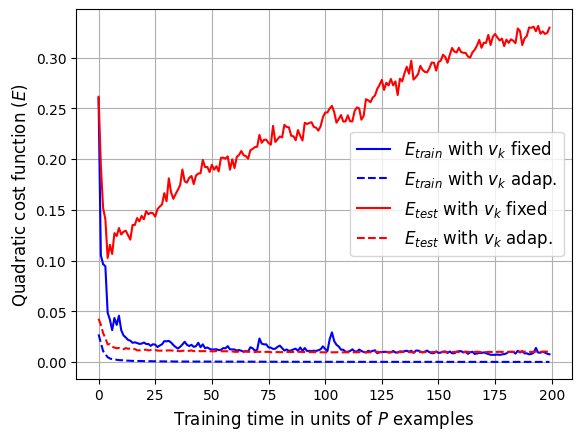

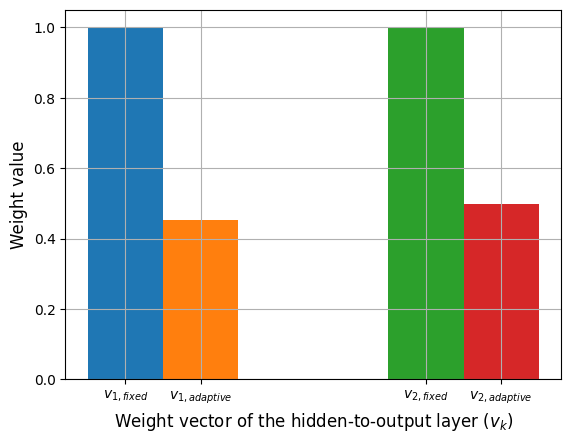

In [ ]:
FontSize = 12

t = range(t_max)
plt.plot(t, E_train, '-b', label='$E_{train}$ with $v_k$ fixed')
plt.plot(t, E_train_a, '--b', label='$E_{train}$ with $v_k$ adap.')
plt.plot(t, E_test, '-r', label='$E_{test}$ with $v_k$ fixed')
plt.plot(t, E_test_a, '--r', label='$E_{test}$ with $v_k$ adap.')
plt.xlabel('Training time in units of $P$ examples', fontsize=FontSize)
plt.ylabel('Quadratic cost function ($E$)', fontsize=FontSize)
plt.grid()
plt.legend(fontsize=FontSize)

plt.savefig("Data_bonus/Bonus3/comparison.eps")

plt.show()
# plt.title(title)

# def plot_weights(weight_matrix, bin_width=0.3, title = ''):

# N_dim = len(W[:, 0])
# bin_width = 0.2
# x = np.array(range(N_dim))
# plt.bar(x - bin_width *1.5, W[:,0], width=bin_width,  label='w1')
# plt.bar(x - bin_width *0.5, W[:,1], width=bin_width, label='w2')
# plt.bar(x + bin_width *0.5, W_a[:,0], width=bin_width, label='w1')
# plt.bar(x + bin_width *1.5, W_a[:,1], width=bin_width,  label='w2')
# plt.xlabel('Weight component')
# plt.ylabel('Weight value')
# plt.xticks(range(0, N_dim, 5))
# plt.grid()
# plt.legend()
# plt.show()


bin_width = 0.5
x_pos = [0.75, 1.25, 2.75, 3.25]
plt.bar(x_pos[0], v[0], width=bin_width,  label='v1')
plt.bar(x_pos[1], v_a[0], width=bin_width, label='v1')

plt.bar(x_pos[2], v[1], width=bin_width, label='v2')
plt.bar(x_pos[3], v_a[1], width=bin_width,  label='v2')
plt.xlabel('Weight vector of the hidden-to-output layer ($v_k$)', fontsize=FontSize)
plt.ylabel('Weight value', fontsize=FontSize)
# plt.xticks(range(0, K, 5))
plt.xticks(x_pos, ['$v_{1,fixed}$', '$v_{1,adaptive}$', '$v_{2,fixed}$', '$v_{2,adaptive}$'],  fontsize=FontSize)
plt.grid()
# plt.legend()

plt.savefig("Data_bonus/Bonus3/weights.eps")
plt.show()



# plot_costs(W, E_train, E_test, title='2 hidden units. Adaptative $v_k $')
# plot_weights(W, title='2 hidden units. Adaptative $v_k$')

In [24]:
v_a[0], v_a[1]

(array([0.45292948]), array([0.49929984]))

### Bonus point: Different K fixed v =  1/k on data3

In [7]:
K = [2, 4, 7, 10]
P = 100; Q = 200; t_max = 200

E_train_k = []; E_test_k = []
for kk in range(len(K)):
    (W, v), (E_train, E_test) = train_feed_forward_nn(D, K[kk], P, Q, t_max, eta=0.05, fixed_v=1/K[kk])
    E_train_k.append(E_train); E_test_k.append(E_test)

# Step 1 out of 200
# Step 2 out of 200
# Step 3 out of 200
# Step 4 out of 200
# Step 5 out of 200
# Step 6 out of 200
# Step 7 out of 200
# Step 8 out of 200
# Step 9 out of 200
# Step 10 out of 200
# Step 11 out of 200
# Step 12 out of 200
# Step 13 out of 200
# Step 14 out of 200
# Step 15 out of 200
# Step 16 out of 200
# Step 17 out of 200
# Step 18 out of 200
# Step 19 out of 200
# Step 20 out of 200
# Step 21 out of 200
# Step 22 out of 200
# Step 23 out of 200
# Step 24 out of 200
# Step 25 out of 200
# Step 26 out of 200
# Step 27 out of 200
# Step 28 out of 200
# Step 29 out of 200
# Step 30 out of 200
# Step 31 out of 200
# Step 32 out of 200
# Step 33 out of 200
# Step 34 out of 200
# Step 35 out of 200
# Step 36 out of 200
# Step 37 out of 200
# Step 38 out of 200
# Step 39 out of 200
# Step 40 out of 200
# Step 41 out of 200
# Step 42 out of 200
# Step 43 out of 200
# Step 44 out of 200
# Step 45 out of 200
# Step 46 out of 200
# Step 47 out of 200
# Step 48 out of 200
#

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


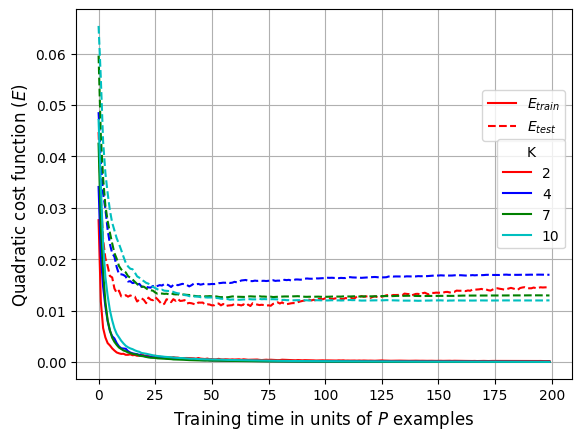

In [15]:
K = [2, 4, 7, 10]
colours_list = ['r', 'b', 'g', 'c', 'k']
plot_lines = []
FontSize=12
for kk in range(len(K)):
    t = range(t_max)
    l1, = plt.plot(t, E_train_k[kk], label='K ='+str(kk), color=colours_list[kk], linestyle = '-')
    l2, = plt.plot(t, E_test_k[kk], label='K ='+str(kk), color=colours_list[kk], linestyle = '--')
    plt.xlabel('Training time in units of $P$ examples', fontsize=FontSize)
    plt.ylabel('Quadratic cost function ($E$)', fontsize=FontSize)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0],  ["$E_{train}$", "$E_{test}$"], loc='best', bbox_to_anchor=(1, 0.8))
plt.legend([l[0] for l in plot_lines], K, title = 'K', loc='center right', bbox_to_anchor=(1, 0.5)) #center left
plt.gca().add_artist(legend1)
plt.grid()
# plt.title('Fixed $v_k = 1/K$')
plt.savefig("Data_bonus/Bonus3/K_comparison.eps")
plt.savefig("Data_bonus/Bonus3/K_comparison.png")
plt.show()

### Bonus: Different K and adaptative vk

In [18]:
K = [2, 4, 7, 10]
P = 100; Q = 200; t_max = 200

E_train_k_v = []; E_test_k_v = []
for kk in range(len(K)):
    (W, v), (E_train, E_test) = train_feed_forward_nn_adap_v(D, K[kk], P, Q, t_max, eta=0.05) 
    E_train_k_v.append(E_train); E_test_k_v.append(E_test)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


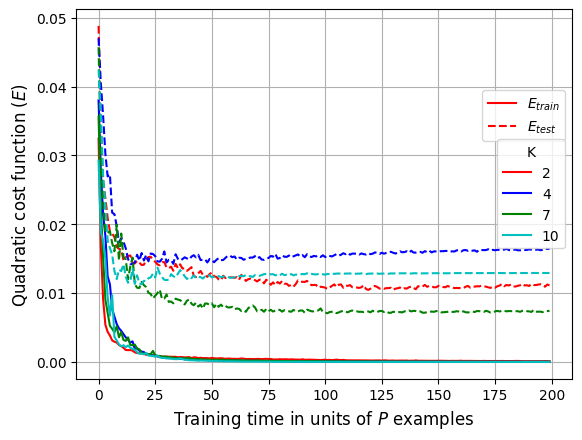

In [19]:
K = [2, 4, 7, 10]
colours_list = ['r', 'b', 'g', 'c', 'k']
plot_lines = []
for kk in range(len(K)):
    t = range(t_max)
    l1, = plt.plot(t, E_train_k_v[kk], label='K ='+str(kk), color=colours_list[kk], linestyle = '-')
    l2, = plt.plot(t, E_test_k_v[kk], label='K ='+str(kk), color=colours_list[kk], linestyle = '--')
    plt.xlabel('Training time in units of $P$ examples', fontsize=FontSize)
    plt.ylabel('Quadratic cost function ($E$)', fontsize=FontSize)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0],  ["$E_{train}$", "$E_{test}$"], loc='best', bbox_to_anchor=(1, 0.8))
plt.legend([l[0] for l in plot_lines], K, title = 'K', loc='center right', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(legend1)
plt.grid()
# plt.title('Fixed $v_k = 1/K$')
plt.savefig("Data_bonus/Bonus3/K_v_comparison.eps")
plt.show()